**Problem statement :**
- The system in focus is the Air Pressure system (APS) which generates pressurized air that are utilized in various functions in a truck, such as braking and gear changes. The datasets positive class corresponds to component failures for a specific component of the APS system. The negative class corresponds to trucks with failures for components not related to the APS system.

- The problem is to reduce the cost due to unnecessary repairs. So it is required to minimize the false predictions.

- The total cost of a prediction model the sum of `Cost_1` multiplied by the number of Instances with type 1 failure and `Cost_2` with the number of instances with type 2 failure, resulting in a `Total_cost`. In this case `Cost_1` refers to the cost that an unnessecary check needs to be done by an mechanic at an workshop, while `Cost_2` refer to the cost of missing a faulty truck, which may cause a breakdown.

`Total_cost = Cost_1 * No_Instances + Cost_2 * No_Instances.`

In [ ]:
import pandas as pd

In [ ]:
# read the data

df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ml_project/dataset/APS/train.csv", na_values="na")
df

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,pos,153204,0.0,1.820000e+02,NaN,0.0,0.0,0.0,0.0,0.0,...,129862.0,26872.0,34044.0,22472.0,34362.0,0.0,0.0,0.0,0.0,0.0
1,pos,453236,NaN,2.926000e+03,NaN,0.0,0.0,0.0,0.0,222.0,...,7908038.0,3026002.0,5025350.0,2025766.0,1160638.0,533834.0,493800.0,6914.0,0.0,0.0
2,pos,72504,NaN,1.594000e+03,1052.0,0.0,0.0,0.0,244.0,178226.0,...,1432098.0,372252.0,527514.0,358274.0,332818.0,284178.0,3742.0,0.0,0.0,0.0
3,pos,762958,NaN,NaN,NaN,NaN,NaN,776.0,281128.0,2186308.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,pos,695994,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,...,1397742.0,495544.0,361646.0,28610.0,5130.0,212.0,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36183,neg,153002,NaN,6.640000e+02,186.0,0.0,0.0,0.0,0.0,0.0,...,998500.0,566884.0,1290398.0,1218244.0,1019768.0,717762.0,898642.0,28588.0,0.0,0.0
36184,neg,2286,NaN,2.130707e+09,224.0,0.0,0.0,0.0,0.0,0.0,...,10578.0,6760.0,21126.0,68424.0,136.0,0.0,0.0,0.0,0.0,0.0
36185,neg,112,0.0,2.130706e+09,18.0,0.0,0.0,0.0,0.0,0.0,...,792.0,386.0,452.0,144.0,146.0,2622.0,0.0,0.0,0.0,0.0
36186,neg,80292,NaN,2.130706e+09,494.0,0.0,0.0,0.0,0.0,0.0,...,699352.0,222654.0,347378.0,225724.0,194440.0,165070.0,802280.0,388422.0,0.0,0.0


In [ ]:
df.isnull().sum()

,0
class,0
aa_000,0
ab_000,27896
ac_000,2141
ad_000,9200
...,...
ee_007,379
ee_008,379
ee_009,379
ef_000,1730


In [ ]:
df.shape

(36188, 171)

In [ ]:
# check values count for target variable - class
df['class'].value_counts()

,count
class,
neg,35188
pos,1000


Problem 1: we need to handle the imbalance data

In [ ]:
# count of numerical and non numerical columns

numeric_features = [features for features in df.columns if df[features].dtype != "O"]
cat_features = [features for features in df.columns if df[features].dtype == "O"]

print(f"we have {len(numeric_features)} numerical features : {numeric_features}")
print(f"we have {len(cat_features)} categorical features : {cat_features}")


we have 170 numerical features : ['aa_000', 'ab_000', 'ac_000', 'ad_000', 'ae_000', 'af_000', 'ag_000', 'ag_001', 'ag_002', 'ag_003', 'ag_004', 'ag_005', 'ag_006', 'ag_007', 'ag_008', 'ag_009', 'ah_000', 'ai_000', 'aj_000', 'ak_000', 'al_000', 'am_0', 'an_000', 'ao_000', 'ap_000', 'aq_000', 'ar_000', 'as_000', 'at_000', 'au_000', 'av_000', 'ax_000', 'ay_000', 'ay_001', 'ay_002', 'ay_003', 'ay_004', 'ay_005', 'ay_006', 'ay_007', 'ay_008', 'ay_009', 'az_000', 'az_001', 'az_002', 'az_003', 'az_004', 'az_005', 'az_006', 'az_007', 'az_008', 'az_009', 'ba_000', 'ba_001', 'ba_002', 'ba_003', 'ba_004', 'ba_005', 'ba_006', 'ba_007', 'ba_008', 'ba_009', 'bb_000', 'bc_000', 'bd_000', 'be_000', 'bf_000', 'bg_000', 'bh_000', 'bi_000', 'bj_000', 'bk_000', 'bl_000', 'bm_000', 'bn_000', 'bo_000', 'bp_000', 'bq_000', 'br_000', 'bs_000', 'bt_000', 'bu_000', 'bv_000', 'bx_000', 'by_000', 'bz_000', 'ca_000', 'cb_000', 'cc_000', 'cd_000', 'ce_000', 'cf_000', 'cg_000', 'ch_000', 'ci_000', 'cj_000', 'ck_000'

In [ ]:
# checking the missing values
df.isnull().sum()

,0
class,0
aa_000,0
ab_000,27896
ac_000,2141
ad_000,9200
...,...
ee_007,379
ee_008,379
ee_009,379
ef_000,1730


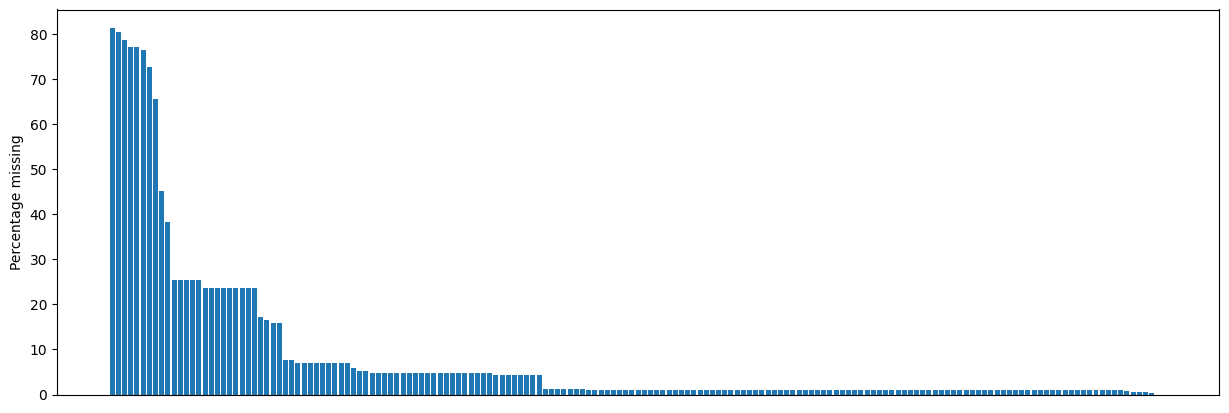

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15,5))

missing = df.isna().sum().div(df.shape[0]).mul(100).to_frame().sort_values(by=0, ascending=False)

ax.bar(missing.index, missing.values.T[0])

plt.xticks([])
plt.ylabel("Percentage missing")
plt.show()

In [ ]:
# dropping columns which has more than 70% of misisng values
dropcols = missing[missing[0]>70]
dropcols

,0
br_000,81.410965
bq_000,80.501824
bp_000,78.794075
ab_000,77.086327
cr_000,77.086327
bo_000,76.533658
bn_000,72.761689


In [ ]:
df.drop(columns=dropcols.index,  inplace=True)

problem 2 - we need to handle the missing datas

In [ ]:
# to check the total percentage of missing values inside a full dataset
import numpy as np


missing_values_count = df.isnull().sum()
total_cells = np.product(df.shape)
total_missing = missing_values_count.sum()

print(f"percentage of total missing cell in the data {(total_missing/total_cells)*100}")

percentage of total missing cell in the data 5.37059852747306


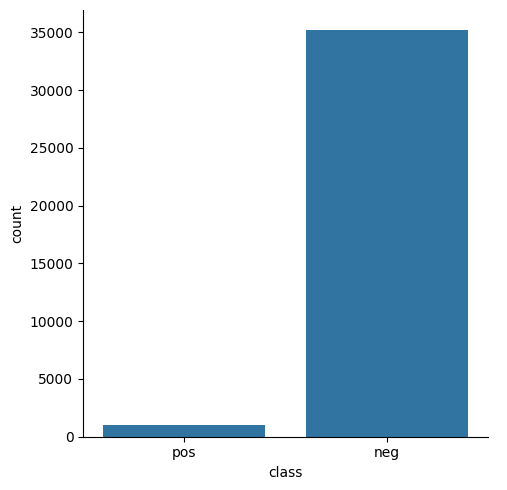

In [ ]:
# visulaize the uniqye value in Target

import seaborn as sns

sns.catplot(data=df, x="class", kind="count")

SMOTETomek -> https://towardsdatascience.com/imbalanced-classification-in-python-smote-tomek-links-method-6e48dfe69bbc

In [ ]:
X = df.drop('class', axis=1)
y = df['class']

In [ ]:
# Manually encoding the target Variable
y = y.replace({"pos":1, "neg":0})

In [ ]:
y

,class
0,1
1,1
2,1
3,1
4,1
...,...
36183,0
36184,0
36185,0
36186,0


In [ ]:
# Experiment 1 -> mean
# Experiment 2 -> constasnt
# Exepriment 3 -> median

Robust scalar -
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html

In [ ]:
# Experiment 1 -> Mean imputing with RobustScaler

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

robust_scaler = RobustScaler()
x1 = robust_scaler.fit_transform(X)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer, KNNImputer

In [ ]:
mean_pipeline = Pipeline(steps=
 [("imputer" , SimpleImputer(strategy="mean")),
 ("RobustScaler", RobustScaler())]
)

In [ ]:
X_mean = mean_pipeline.fit_transform(X)

In [ ]:
mean_pipeline

Pipeline(steps=[('imputer', SimpleImputer()), ('RobustScaler', RobustScaler())])

In [ ]:
from imblearn.combine import SMOTETomek

smt = SMOTETomek(sampling_strategy="minority", n_jobs=-1)
X_res, y_res = smt.fit_resample(X_mean, y)

/usr/local/lib/python3.10/dist-packages/imblearn/over_sampling/_smote/base.py:370: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

models = {
    "Random forest" : RandomForestClassifier(),
    "Decision Tree" : DecisionTreeClassifier(),
    "XG boost" : XGBClassifier(),
    "Knn" : KNeighborsClassifier(),
    "logistic" : LogisticRegression()
}

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, \
                            f1_score, roc_auc_score, confusion_matrix


def evaluate_clf(true, predicted):

  acc= accuracy_score(true, predicted)
  pre= precision_score(true, predicted)
  recall= recall_score(true, predicted)
  f1= f1_score(true, predicted)
  auc= roc_auc_score(true, predicted)

  return acc, pre, recall, f1, auc

def total_cost(true, predicted):
  tn, fp, fn, tp = confusion_matrix(true, predicted).ravel()
  cost = 10*fp + 500*fn
  return cost

def evaluate_models(X, y, models):

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  cost_list = []
  models_list = []

  for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)

    #make predictions
    y_test_pred = model.predict(X_test)

    # performance
    acc, pre, recall, f1, auc = evaluate_clf(y_test, y_test_pred)
    cost = total_cost(y_test, y_test_pred)

    print(list(models.keys())[i])
    models_list.append(list(models.keys())[i])

    print("Model performance on test data")
    print(f'- Accuracy: {acc}')
    print(f'- precision: {pre}')
    print(f'- recall: {recall}')
    print(f'- f1 score: {f1}')
    print(f'- auc: {auc}')
    print(f'- cost: {cost}')

    cost_list.append(cost)
    print('='*35)

  report = pd.DataFrame(list(zip(models_list, cost_list)), columns=["Model Name", "Cost"]).sort_values(by=["Cost"])

  return report



In [ ]:
report = evaluate_models(X_res, y_res, models)

Random forest
Model performance on test data
- Accuracy: 0.9937967914438502
- precision: 0.9903037216597746
- recall: 0.9972716829408386
- f1 score: 0.9937754883022107
- auc: 0.9938206594848648
- cost: 10180
Decision Tree
Model performance on test data
- Accuracy: 0.9858823529411764
- precision: 0.9827340182648402
- recall: 0.9889431361286617
- f1 score: 0.985828800458059
- auc: 0.9859033765900352
- cost: 39710
XG boost
Model performance on test data
- Accuracy: 0.9964349376114082
- precision: 0.9944221967963387
- recall: 0.9984204480183803
- f1 score: 0.9964173115505877
- auc: 0.9964485755174751
- cost: 5890
Knn
Model performance on test data
- Accuracy: 0.97475935828877
- precision: 0.9624965015393226
- recall: 0.9876507754164273
- f1 score: 0.9749114103472715
- auc: 0.9748479057651462
- cost: 45680
logistic
Model performance on test data
- Accuracy: 0.699108734402852
- precision: 0.6371177293623825
- recall: 0.9154221711659966
- f1 score: 0.7513258691809075
- auc: 0.7005945298543479

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
report

,Model Name,Cost
2,XG boost,5890
0,Random forest,10180
1,Decision Tree,39710
3,Knn,45680
4,logistic,330810


In [ ]:
constant_pipeline = Pipeline(steps=
 [("imputer" , SimpleImputer(strategy="constant", fill_value=0)),
 ("RobustScaler", RobustScaler())]
)

X_constant = constant_pipeline.fit_transform(X)

smt = SMOTETomek(sampling_strategy="minority", n_jobs=-1)
X_res, y_res = smt.fit_resample(X_constant, y)

report = evaluate_models(X_res, y_res, models)

/usr/local/lib/python3.10/dist-packages/imblearn/over_sampling/_smote/base.py:370: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


Random forest
Model performance on test data
- Accuracy: 0.9929421829329151
- precision: 0.9896052816406798
- recall: 0.9964639321074965
- f1 score: 0.9930227641130454
- auc: 0.992913581692673
- cost: 13240
Decision Tree
Model performance on test data
- Accuracy: 0.9859556569473159
- precision: 0.9823157894736843
- recall: 0.9899575671852899
- f1 score: 0.9861218738992603
- auc: 0.9859231561670304
- cost: 36760
XG boost
Model performance on test data
- Accuracy: 0.9964354459257146
- precision: 0.9942269783159673
- recall: 0.9987270155586987
- f1 score: 0.9964719164549816
- auc: 0.996416835363078
- cost: 4910
Knn
Model performance on test data
- Accuracy: 0.9720538960576032
- precision: 0.9580246913580247
- recall: 0.9878359264497878
- f1 score: 0.9727019498607242
- auc: 0.9719257251912586
- cost: 46060
logistic
Model performance on test data
- Accuracy: 0.6554502031795822
- precision: 0.5954432972096595
- recall: 0.986987270155587
- f1 score: 0.7427750279418809
- auc: 0.652757685674314

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
report

,Model Name,Cost
2,XG boost,4910
0,Random forest,13240
1,Decision Tree,36760
3,Knn,46060
4,logistic,93410


In [ ]:
median_pipeline = Pipeline(steps=
 [("imputer" , SimpleImputer(strategy="median")),
 ("RobustScaler", RobustScaler())]
)

X_median = median_pipeline.fit_transform(X)

smt = SMOTETomek(sampling_strategy="minority", n_jobs=-1)
X_res, y_res = smt.fit_resample(X_median, y)

report = evaluate_models(X_res, y_res, models)

/usr/local/lib/python3.10/dist-packages/imblearn/over_sampling/_smote/base.py:370: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


Random forest
Model performance on test data
- Accuracy: 0.9912987661365095
- precision: 0.9875070982396366
- recall: 0.9951359084406295
- f1 score: 0.9913068262790365
- auc: 0.9913099539358602
- cost: 17880
Decision Tree
Model performance on test data
- Accuracy: 0.9868768276157193
- precision: 0.9843438656419015
- recall: 0.9894134477825465
- f1 score: 0.9868721461187214
- auc: 0.986884223535705
- cost: 38100
XG boost
Model performance on test data
- Accuracy: 0.9961486341915697
- precision: 0.9933143669985776
- recall: 0.9989985693848354
- f1 score: 0.9961483594864479
- auc: 0.9961569436314023
- cost: 3970
Knn
Model performance on test data
- Accuracy: 0.9706868269025034
- precision: 0.9578288100208768
- recall: 0.984549356223176
- f1 score: 0.971005291005291
- auc: 0.9707272453139774
- cost: 57030
logistic
Model performance on test data
- Accuracy: 0.6229227587190642
- precision: 0.5767186232993964
- recall: 0.9157367668097282
- f1 score: 0.7077229255348555
- auc: 0.623776504582505

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
report

,Model Name,Cost
2,XG boost,3970
0,Random forest,17880
1,Decision Tree,38100
3,Knn,57030
4,logistic,341480


In [ ]:
# Experiemnt 4 - Knn imputer

knn_pipeline = Pipeline(steps=
 [("imputer" , KNNImputer(n_neighbors=3)),
 ("RobustScaler", RobustScaler())]
)

X_knn = knn_pipeline.fit_transform(X)

smt = SMOTETomek(sampling_strategy="minority", n_jobs=-1)
X_res, y_res = smt.fit_resample(X_knn, y)

report = evaluate_models(X_res, y_res, models)

/usr/local/lib/python3.10/dist-packages/imblearn/over_sampling/_smote/base.py:370: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


Random forest
Model performance on test data
- Accuracy: 0.9922314874207113
- precision: 0.9880766501064585
- recall: 0.9964214142570856
- f1 score: 0.9922314874207113
- auc: 0.9922490321817722
- cost: 13340
Decision Tree
Model performance on test data
- Accuracy: 0.9855320362055449
- precision: 0.9818155988066487
- recall: 0.9892642427712568
- f1 score: 0.9855258467023172
- auc: 0.9855476643238825
- cost: 38780
XG boost
Model performance on test data
- Accuracy: 0.9955099422706863
- precision: 0.9918999573681967
- recall: 0.9991411394217006
- f1 score: 0.9955073807316551
- auc: 0.9955251474255415
- cost: 3570
Knn
Model performance on test data
- Accuracy: 0.9723469460480365
- precision: 0.9598550320602175
- recall: 0.9856856570283424
- f1 score: 0.9725988700564973
- auc: 0.9724028001252429
- cost: 52880
logistic
Model performance on test data
- Accuracy: 0.6035207754258428
- precision: 0.56182118342167
- recall: 0.9255654165473804
- f1 score: 0.6992160043254935
- auc: 0.60486929450506

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# PCA
# Final
